<h1 style='text-align:center'>Looking at topographical and meteorological data<h1>

In [57]:
# %matplotlib widget

import os
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### A-) Topographical data

#### 1-) Looking at file structure

In [58]:
topo_file = "data/N26E006.SRTMGL1_NC.nc"

ds = Dataset(topo_file) 
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GDAL_AREA_OR_POINT: Point
    Conventions: CF-1.5
    GDAL: GDAL 2.2.0dev, released 2016/99/99
    history: Fri Apr 12 12:57:09 2019: /usr/bin/ncks -O --netcdf4 /datapool/TS2/user/TEST/SRTM/data_OPS/N26E006.SRTMGL1_NC.3.nc /datapool/TS2/user/TEST/SRTM/data_OPS/N26E006.SRTMGL1_NC.nc
Fri Apr 12 12:57:09 2019: /usr/bin/ncrename -v Band1,SRTMGL1_DEM /datapool/TS2/user/TEST/SRTM/data_OPS/N26E006.SRTMGL1_NC.3.nc
Fri Apr 12 12:57:09 2019: /usr/bin/ncatted -O -a long_name,Band1,o,c,Shuttle Radar Topography Mission (SRTM) Global 1 arc-second Digital Elevation Model (DEM) -a valid_range,Band1,o,s,-32767, 32767 -a standard_name,Band1,o,c,height -a units,Band1,o,c,meters /datapool/TS2/user/TEST/SRTM/data_OPS/N26E006.SRTMGL1_NC.3.nc
Fri Apr 12 12:57:08 2019: GDAL CreateCopy( /datapool/TS2/user/TEST/SRTM/data_OPS/N26E006.SRTMGL1_NC.3.nc, ... )
    NCO: 4.3.7
    dimensions(sizes): lat(3601), lon(3601)
    varia

#### 2-) Plotting data

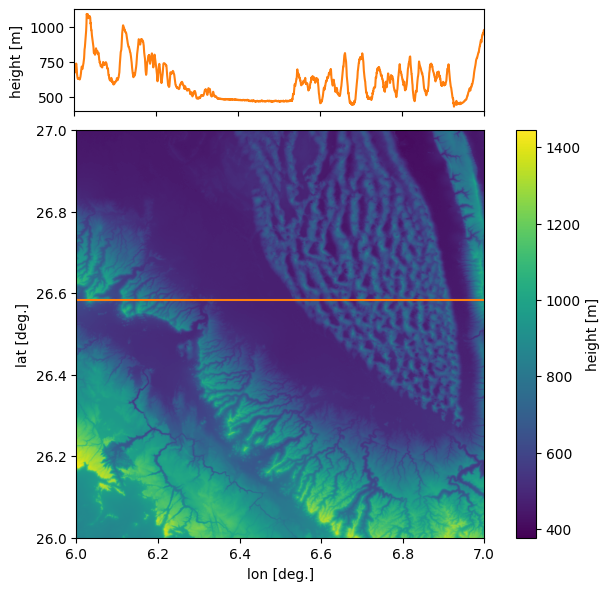

In [44]:
lon, lat, DEM = ds.variables['lon'][:].data, ds.variables['lat'][:].data, ds.variables['SRTMGL1_DEM'][:].data
LON, LAT = np.meshgrid(lon, lat)

extent = [lon.min(), lon.max(), lat.min(), lat.max()]
ind_transect = 1500

fig, axarr  = plt.subplots(2, 1, constrained_layout=True, 
                           sharex=True, height_ratios=[0.25, 1],
                          figsize=(6, 5.8))
axarr[0].plot(lon, DEM[ind_transect, :], color='tab:orange')
axarr[0].set_ylabel('height [m]')

im = axarr[1].imshow(DEM, extent=extent)
axarr[1].axhline(lat[ind_transect], color='tab:orange')
axarr[1].set_xlabel('lon [deg.]')
axarr[1].set_ylabel('lat [deg.]')
plt.colorbar(im, label='height [m]')
plt.show()

### B-) Meteorological data

#### B.1 Surface quantities

In [45]:
wind_file = 'data/adaptor.mars.internal-1675099370.7887764-14315-8-262515c1-1605-461d-a45b-708ab30fbf0b.nc'

ds = Dataset(wind_file) 
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-01-30 17:22:51 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data4/adaptor.mars.internal-1675099370.7887764-14315-8-262515c1-1605-461d-a45b-708ab30fbf0b.nc /cache/tmp/262515c1-1605-461d-a45b-708ab30fbf0b-adaptor.mars.internal-1675099368.8654017-14315-14-tmp.grib
    dimensions(sizes): longitude(11), latitude(11), time(1)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time, latitude, longitude), int16 v10(time, latitude, longitude)
    groups: 


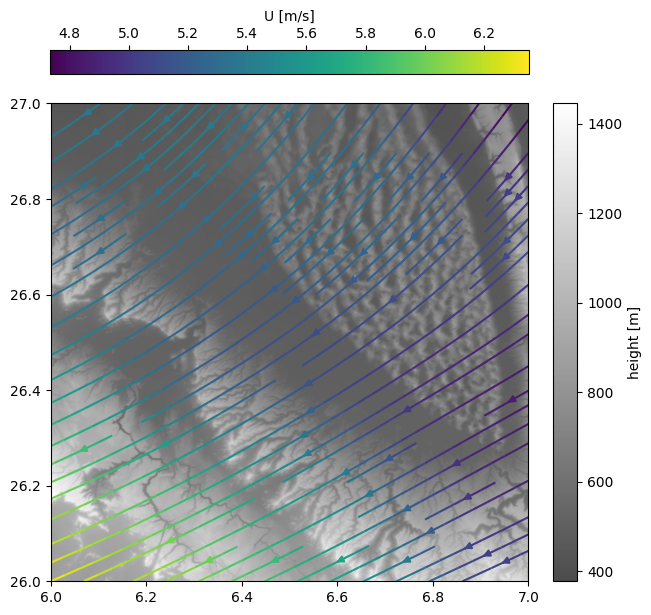

In [14]:
lon_w = np.around(ds.variables['longitude'][:].data.astype('float64'), 1) 
lat_w = np.around(ds.variables['latitude'][:].data[::-1].astype('float64'), 1)
u10, v10 = ds.variables['u10'][:].data.squeeze(), ds.variables['v10'][:].data.squeeze()
U = np.sqrt(u10**2 + v10**2)


# ### figure
fig, ax  = plt.subplots(1, 1, constrained_layout=True,  sharex=True, figsize=(6.1,6))

im = ax.imshow(DEM, extent=extent, alpha=0.7, cmap='gray')
strm = ax.streamplot(lon_w, lat_w, u10, v10, color=U, cmap='viridis')


axarr[1].axhline(lat[ind_transect], color='tab:orange')
axarr[1].set_xlabel('lon [deg.]')
axarr[1].set_ylabel('lat [deg.]')
plt.colorbar(im, label='height [m]')
plt.colorbar(strm.lines, label='U [m/s]', location='top')
plt.show()

